# KNN Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/janakiramanprakash/Desktop/netzwerk/assignments/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.drop('User ID' , axis = 1, inplace = True)

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
df = pd.get_dummies(df,drop_first = True)

In [10]:
x = x = df.loc [:,['Gender_Male','Age','EstimatedSalary']].values

In [11]:
y = df.loc[:,['Purchased']].values

In [12]:
from sklearn .preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [38]:
X = sc.fit_transform(x)

In [39]:
Y = y.reshape(-1)

In [40]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix

# Trial and Error method to choose K-Value

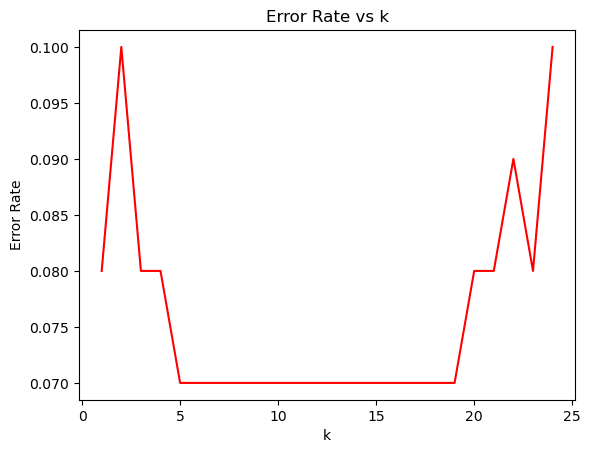

In [51]:
acc_list = []
err_list = []

for i in range (1,25):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    y_pred = model.predict (x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

plt.plot(list(range(1,25)),err_list, c = 'r')
plt.title('Error Rate vs k')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [52]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train,y_train)
y_pred = model.predict (x_test)
confusion_matrix(y_test,y_pred)


array([[64,  4],
       [ 3, 29]])

In [53]:
accuracy_score(y_test,y_pred)

0.93